# Subradiance in a Chain

Our plan is to calculate the electric field intensity of the most subradiant state in the single excitation manifold in a achina of `25` atoms.

In [11]:
using CollectiveSpins, QuantumOptics

## Define Geometry

As a first step we define the system's geometry. Our system constists of `25` dipoles in a chain with the dipole orientation of each spin pointing in the `x`-direction.

In [8]:
N = 25
d = 0.33
pos = CollectiveSpins.geometry.chain(d, N)
dip = [1., 0., 0.]
S = CollectiveSpins.SpinCollection(pos, dip);

## Define Single Excitation Basis

We now use the `ReducedSpinBasis` in order to create the ground state and the single excitation manifold. We will then create the non-Hermitian Hamiltonian and find it's lowest eigenvalue eigenstate.

In [14]:
b = CollectiveSpins.ReducedSpinBasis(N, 1)
Heff = CollectiveSpins.reducedspin.Hamiltonian_nh(b, S)
psi = eigenstates(dense(Heff))[2][end-3];

┌ Warning: The given operator is not hermitian. If this is due to a numerical error make the operator hermitian first by calculating (x+dagger(x))/2 first.
└ @ QuantumOptics /Users/laurin/.julia/packages/QuantumOptics/9nE92/src/spectralanalysis.jl:30


`QuantumOptics` gives us a warning here, as we are calculating eigenvalues and eigenstates of a non-Hermitian Hamiltonian. In this case, we can safely ignore this warning, as we have pupousfully created a non-Hermitian operator.

## Calculate the Eletric Field

We will now calculate the emitted electric field by creating a function `F` that will give us the field as a function of our position given the system and the state.

Then we will deifne our grid and evaluate the field on this grid in order to plot it.

In [15]:
I_exp(r) = CollectiveSpins.field.intensity(r, S, psi)

x = collect(range(-5.0, stop=N*d+5.0, length=80))
y = collect(range(-10.0, stop=10.0, length=80))
z = 3*d
G =[[x1, y1, z1] for z1=z, y1=y, x1=x];

I_profile = [real(I_exp(g)) for g=G];

There is one pitfall here: make sure you create your grid with the iterator order z`, `y`, `x`, otherwise the `contourf` function will draw unexpected things. Of course, also other methods for creating a 2D grid can be used.

## Plot the Field

Lastly, we visualize our electric field as well as the emitter's positions, where the  opacity of the individual emitters corresponds to their excitation.

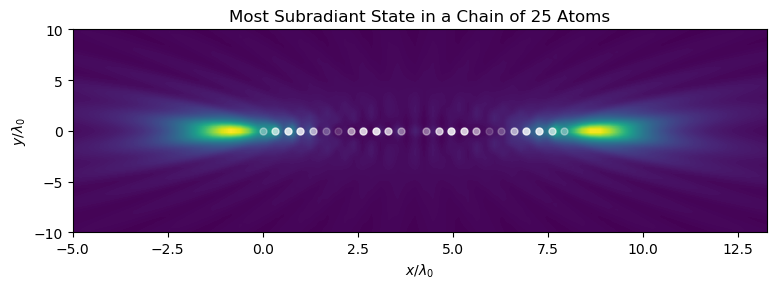

In [16]:
using PyPlot
figure(figsize=(8, 3))
contourf(x, y, I_profile, 200,cmap="viridis")
for i = 1:N
	alpha_ = abs.(dagger(CollectiveSpins.reducedspinstate(b,[i]))*psi)
	plot(pos[i][1],pos[i][2],"wo",markersize=5,alpha=3*alpha_)
end
xlabel(L"$x / \lambda_0$")
ylabel(L"y / \lambda_0")
title("Most Subradiant State in a Chain of 25 Atoms")
tight_layout()